In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
?np.zeros

In [14]:
    map = np.array([[1, 0, 0, 1],
                     [1, 0, 0, 1],
                     [1, 0, 0, 1],
                     [1, 0, 0, 1]])

In [9]:
m = np.array(np.where(map)).T.tolist()

In [10]:
for (x, y) in m:
    print(" {} {}".format(x, y))

 0 0
 0 3
 1 0
 1 3
 2 0
 2 3
 3 0
 3 3


In [104]:
x = np.array([[0, 1, 0],
              [2, 0, 4],
              [0, 3, 0]])

In [13]:
np.rot90(x)

array([[0, 4, 0],
       [1, 0, 3],
       [0, 2, 0]])

In [16]:
np.flipud(np.rot90(x))

array([[0, 2, 0],
       [1, 0, 3],
       [0, 4, 0]])

In [26]:
np.sqrt(0.2) * np.random.randn(4)

array([-0.1239218 ,  0.10757804,  0.18726995,  0.39353207])

In [28]:
?np.random.choice

In [31]:
[1,2,3].index(1)

0

In [35]:
np.random.normal()

0.2725245030222611

In [52]:
    def get_uncertainty():
        counts = np.zeros((4, 4))
        # RIGHT=0  LEFT=1 UP=2 DOWN=3 
        counter = 0
        while(counter<100):
            velocities = [[1, 0], [-1, 0], [0, 1], [0, -1]]
            v = velocities[np.random.choice(4)]
            v_idx = velocities.index(v)
            v_new = [dist+np.sqrt(0.3)*np.random.normal() for dist in v]

            def l2_norm(v):
                diff = np.array(v) - np.array(v_new)
                return np.linalg.norm(diff)

            v_new = min(velocities, key=l2_norm)
            v_new_idx = velocities.index(v_new)
            counts[v_idx, v_new_idx] += 1
            counter += 1
        with np.errstate(divide='ignore', invalid='ignore'):
            probs = counts / counts.sum(axis=0, keepdims=True)
            probs[~np.isfinite(probs)] = 0
        return probs

In [53]:
get_uncertainty()

array([[ 0.83333333,  0.        ,  0.0625    ,  0.09677419],
       [ 0.02777778,  0.88235294,  0.125     ,  0.03225806],
       [ 0.08333333,  0.05882353,  0.8125    ,  0.        ],
       [ 0.05555556,  0.05882353,  0.        ,  0.87096774]])

In [15]:
reachability = np.zeros((map.shape[0], map.shape[1], 3, 3))
padded_map = np.pad(map, 1, 'constant', constant_values=1)
for i in range(map.shape[0]):
    for j in range(map.shape[1]):
        reachability[i, j, :, :] = 1 - (map[i, j] or padded_map[i:i+3, j:j+3])

In [16]:
padded_map

array([[1, 1, 1, 1, 1, 1],
       [1, 1, 0, 0, 1, 1],
       [1, 1, 0, 0, 1, 1],
       [1, 1, 0, 0, 1, 1],
       [1, 1, 0, 0, 1, 1],
       [1, 1, 1, 1, 1, 1]])

In [18]:
reachability[0,1]

array([[ 0.,  0.,  0.],
       [ 0.,  1.,  1.],
       [ 0.,  1.,  1.]])

In [21]:
x = np.zeros((4,4,5,5))

In [22]:
y = x[2:, 1:-1, 0, 0]

array([[ 0.,  0.],
       [ 0.,  0.]])

In [27]:
y = np.array([[0, 1],
            [2, 3]])

In [29]:
np.rot90(y, axes=(1,0))

array([[2, 0],
       [3, 1]])

In [26]:
y

array([[0, 1],
       [2, 3]])

In [43]:
np.random.dirichlet([0.85, 0.05, 0.05, 0.05])

array([  9.10136862e-01,   8.98556941e-02,   9.71915691e-08,
         7.34697402e-06])

In [52]:
np.abs(np.random.rand(3,3))

array([[ 0.43601764,  0.37832257,  0.59704033],
       [ 0.46716958,  0.908089  ,  0.99987009],
       [ 0.65772936,  0.10260193,  0.2324162 ]])

In [53]:
?np.random.dirichlet

In [74]:
np.random.dirichlet(np.ones(3)*100, size=3)

array([[ 0.32822285,  0.31680235,  0.3549748 ],
       [ 0.25878265,  0.33589295,  0.40532439],
       [ 0.35073832,  0.34199092,  0.30727076]])

In [75]:
def gkern(l=5, sig=1.):
    """
    creates gaussian kernel with side length l and a sigma of sig
    """

    ax = np.arange(-l // 2 + 1., l // 2 + 1.)
    xx, yy = np.meshgrid(ax, ax)

    kernel = np.exp(-(xx**2 + yy**2) / (2. * sig**2))

    return kernel / np.sum(kernel)

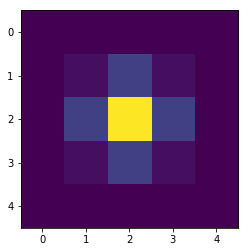

In [87]:
plt.imshow(gkern(sig=np.sqrt(0.3)))

In [84]:
gkern(sig=0.3)

array([[  4.91284503e-20,   8.50304407e-13,   2.19948777e-10,
          8.50304407e-13,   4.91284503e-20],
       [  8.50304407e-13,   1.47168816e-05,   3.80682503e-03,
          1.47168816e-05,   8.50304407e-13],
       [  2.19948777e-10,   3.80682503e-03,   9.84713831e-01,
          3.80682503e-03,   2.19948777e-10],
       [  8.50304407e-13,   1.47168816e-05,   3.80682503e-03,
          1.47168816e-05,   8.50304407e-13],
       [  4.91284503e-20,   8.50304407e-13,   2.19948777e-10,
          8.50304407e-13,   4.91284503e-20]])

In [105]:
x = np.zeros((3, 3, 4, 4))

In [91]:
y = np.random.randn(4, 4)

In [92]:
y

array([[ 0.29141275, -0.82562461,  0.95842284,  0.86084924],
       [ 0.45353661,  0.87564277,  0.87780198, -0.72389385],
       [-0.0894305 , -0.79761931, -0.66070647,  0.26222543],
       [-0.07441204,  1.17424322,  1.13967393, -0.36401383]])

In [93]:
x[:, :, :, :] = y

In [94]:
x[0, 0]

array([[ 0.29141275, -0.82562461,  0.95842284,  0.86084924],
       [ 0.45353661,  0.87564277,  0.87780198, -0.72389385],
       [-0.0894305 , -0.79761931, -0.66070647,  0.26222543],
       [-0.07441204,  1.17424322,  1.13967393, -0.36401383]])

In [103]:
x[(0,0), 1, 1]

array([[ 0.45353661,  0.87564277,  0.87780198, -0.72389385],
       [ 0.45353661,  0.87564277,  0.87780198, -0.72389385]])

In [106]:
x[[0, 0,1,1]]

array([[[[ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.]],

        [[ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.]],

        [[ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.]]],


       [[[ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.]],

        [[ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.]],

        [[ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.]]],


       [[[ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.]],

        [[ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  

In [1]:
xx  = [1, 2, 3]

In [4]:
map(lambda m: None, xx)

[None, None, None]

In [3]:
?map

In [7]:
np.random.randint(0, 5, 1)

array([3])

In [8]:
assert [] is not None

In [17]:
        a = [[0, 1], [1, 0], [1, 2], [2, 1]] # indices of going to 
        c = list(reversed(a))

In [18]:
c

[[2, 1], [1, 2], [1, 0], [0, 1]]

In [19]:
?np.meshgrid

In [20]:
x_, y_ = np.arange(3), np.arange(3)

In [21]:
xv, yv = np.meshgrid(x_, y_)

In [22]:
xv

array([[0, 1, 2],
       [0, 1, 2],
       [0, 1, 2]])

In [24]:
yv

array([[0, 0, 0],
       [1, 1, 1],
       [2, 2, 2]])

In [25]:
zip(xv, yv)

[(array([0, 1, 2]), array([0, 0, 0])),
 (array([0, 1, 2]), array([1, 1, 1])),
 (array([0, 1, 2]), array([2, 2, 2]))]

In [26]:
flag = np.arange(9).reshape(3, 3)
        

In [27]:
flag

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [28]:
np.rot90(flag)

array([[2, 5, 8],
       [1, 4, 7],
       [0, 3, 6]])

In [29]:
?np.argwhere

In [30]:
np.argwhere(flag==1)

array([[0, 1]])

In [31]:
np.pi

3.141592653589793

In [32]:
pi

NameError: name 'pi' is not defined

In [33]:
import math

In [34]:
math.pi

3.141592653589793

In [37]:
a = np.arange(9).reshape(3, 3)

In [38]:
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [36]:
np.pad(a, (1,1), 'edge')

array([[0, 0, 1, 2, 2],
       [0, 0, 1, 2, 2],
       [3, 3, 4, 5, 5],
       [6, 6, 7, 8, 8],
       [6, 6, 7, 8, 8]])

In [39]:
?np.ndindex

In [66]:
a = np.zeros((3,4))

In [67]:
b = np.array([[1,2],[0,1]]).T.tolist()

In [68]:
b

[[1, 0], [2, 1]]

In [69]:
a[b] = 1

In [70]:
a

array([[ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [71]:
?map

In [72]:
1.0/2

0.5

In [74]:
np.flat

AttributeError: 'module' object has no attribute 'flat'

In [78]:
np.zeros(([1,3]+[2]))

array([[[ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.]]])

In [81]:
np.random.randn(3,4)>0

array([[ True, False,  True,  True],
       [False,  True, False,  True],
       [ True,  True,  True, False]], dtype=bool)

In [3]:
import numpy as np
np.array([[0, 1], [1, 0], [0, -1], [-1, 0],
                      [1, 1], [1, -1], [-1, 1], [-1, -1]]) + [1, 1]

array([[1, 2],
       [2, 1],
       [1, 0],
       [0, 1],
       [2, 2],
       [2, 0],
       [0, 2],
       [0, 0]])